# Análisis exploratorio del subset FiQA – TFM_QA_RAG

**Propósito**: Validar y justificar la calidad y estructura del subset generado a partir del dataset FiQA para pruebas de recuperación de información.  
---
1. [Introducción y objetivos](#1-introducción-y-objetivos)
2. [Carga de datos](#2-carga-de-datos)
3. [Estructura y primeras inspecciones](#3-estructura-y-primeras-inspecciones)
4. [Análisis estadístico básico](#4-análisis-estadístico-básico)
    - 4.1. Dimensiones de los datos
    - 4.2. Distribución de qrels por query
    - 4.3. Distribución de longitud de textos (docs y queries)
    - 4.4. Duplicados y valores nulos
5. [Ejemplos cualitativos](#5-ejemplos-cualitativos)
    - 5.1. Ejemplo de query con sus documentos relevantes
    - 5.2. Ejemplo de texto/documento típico
---
## 1. Introducción y objetivos

En este notebook se realiza un análisis exploratorio del subset de FiQA generado para las pruebas de sistemas de recuperación de información en el marco del TFM.  
El objetivo es validar que:
- Todas las queries seleccionadas cuentan con ground truth (qrels) suficiente.
- El subset es equilibrado y representativo del corpus original.
- No hay problemas de calidad de datos (duplicados, nulo, etc.).
---
## 2. Carga de datos

Se cargan los archivos principales del subset generado:

- `subset_queries.csv`: queries seleccionadas para pruebas
- `subset_corpus.csv`: documentos relevantes para el subset
- `subset_qrels.csv`: ground truth de relevancia para el subset


In [1]:
import pandas as pd

# Cargar archivos del subset
queries = pd.read_csv("../data/subset_queries.csv")
corpus = pd.read_csv("../data/subset_corpus.csv")
qrels = pd.read_csv("../data/subset_qrels.csv")

print("Datos cargados correctamente.")
print(f"Queries: {queries.shape}")
print(f"Corpus: {corpus.shape}")
print(f"Qrels: {qrels.shape}")

Datos cargados correctamente.
Queries: (300, 3)
Corpus: (3000, 4)
Qrels: (778, 3)


---
## 3. Estructura y primeras inspecciones

En esta sección se muestran la estructura (columnas y tipos de datos) y algunas filas ejemplo de cada archivo cargado.  

In [2]:
# Estructura y primeras filas de las queries
print("QUERIES")
print(queries.info())
display(queries.head())

# Estructura y primeras filas del corpus
print("\nCORPUS")
print(corpus.info())
display(corpus.head())

# Estructura y primeras filas de los qrels
print("\nQRELS")
print(qrels.info())
display(qrels.head())


QUERIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       300 non-null    int64 
 1   text      300 non-null    object
 2   metadata  300 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.2+ KB
None


,_id,text,metadata
0,3394,What is the easiest way to back-test index fun...,{}
1,5505,Can I deduct interest and fees on a loan for q...,{}
2,6792,Where to find the full book of outstanding bid...,{}
3,6909,Why do stocks priced above $2.00 on the ASX so...,{}
4,4946,Something looks off about Mitsubishi financial...,{}



CORPUS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _id       3000 non-null   int64  
 1   title     0 non-null      float64
 2   text      2998 non-null   object 
 3   metadata  3000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 93.9+ KB
None


,_id,title,text,metadata
0,1198,NaN,"Yes, as long as you own the shares before the ...",{}
1,2003,NaN,"""While I haven't experienced being """"grad stud...",{}
2,2064,NaN,8 hard inquiries spread over two years is not ...,{}
3,2304,NaN,20% is almost certainly too high. I agree with...,{}
4,2460,NaN,Credit scoring has changed recently and the an...,{}



QRELS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   query_id   778 non-null    int64
 1   doc_id     778 non-null    int64
 2   relevance  778 non-null    int64
dtypes: int64(3)
memory usage: 18.4 KB
None


,query_id,doc_id,relevance
0,15,325273,1
1,18,88124,1
2,26,285255,1
3,26,350819,1
4,42,272709,1


---
## 4. Análisis estadístico básico

Dimensiones, la distribución de qrels por query, la longitud de los textos,...


Total queries: 300
Total documentos: 3000
Total qrels (pares relevantes): 778
Queries SIN ningún documento relevante: 0

Distribución de documentos relevantes por query (qrels por query):
count    300.000000
mean       2.593333
std        2.072585
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       15.000000
dtype: float64

Mínimo docs relevantes por query: 1
Máximo docs relevantes por query: 15
Media docs relevantes por query: 2.59
Mediana docs relevantes por query: 2.0

Documentos SIN ninguna query relevante: 2222


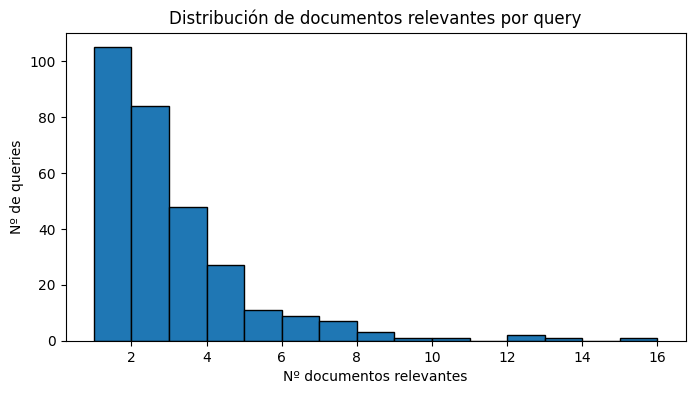

In [3]:
import numpy as np

# Dimensiones básicas
print(f"Total queries: {len(queries)}")
print(f"Total documentos: {len(corpus)}")
print(f"Total qrels (pares relevantes): {len(qrels)}")

# Queries sin ningún documento
qrels_por_query = qrels.groupby('query_id').size()
queries_con_qrels = set(qrels['query_id'])
queries_sin_qrels = set(queries['_id']) - queries_con_qrels
print(f"Queries SIN ningún documento relevante: {len(queries_sin_qrels)}")

# Estadísticas de qrels por query
print("\nDistribución de documentos relevantes por query (qrels por query):")
print(qrels_por_query.describe())

print(f"\nMínimo docs relevantes por query: {qrels_por_query.min()}")
print(f"Máximo docs relevantes por query: {qrels_por_query.max()}")
print(f"Media docs relevantes por query: {qrels_por_query.mean():.2f}")
print(f"Mediana docs relevantes por query: {qrels_por_query.median()}")

# Docs en el corpus que no sean relevantes para ninguna query
docs_con_qrels = set(qrels['doc_id'])
docs_sin_qrels = set(corpus['_id']) - docs_con_qrels
print(f"\nDocumentos SIN ninguna query relevante: {len(docs_sin_qrels)}")

# Histograma de qrels por query
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(qrels_por_query, bins=range(1, qrels_por_query.max()+2), edgecolor='black')
plt.title("Distribución de documentos relevantes por query")
plt.xlabel("Nº documentos relevantes")
plt.ylabel("Nº de queries")
plt.show()


### Análisis de la distribución de qrels por query

- Todas las queries del subset tienen al menos un documento relevante, por lo que el dataset es válido para evaluación.
- La media de documentos relevantes por query es de 2,59, con una mediana de 2. La mayoría de queries tienen entre 1 y 3 docs relevantes, aunque algunas llegan hasta 15.
- El histograma muestra una distribución realista: predominan las queries con pocos relevantes, pero existe variedad.
- Hay 2222 documentos en el corpus que no son relevantes para ninguna query, lo cual es normal ya que se añadieron como “distractores” para simular un entorno de recuperación real.
- No hay queries “huérfanas” ni casos problemáticos. Es un buen subset para pruebas y métricas de IR.



Longitud de textos en el corpus (número de palabras):
count    3000.000000
mean      142.657667
std       133.512980
min         0.000000
25%        60.000000
50%       101.000000
75%       174.000000
max      1635.000000
Name: text_length, dtype: float64

Longitud de queries (número de palabras):
count    300.000000
mean      11.250000
std        4.439956
min        2.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       31.000000
Name: text_length, dtype: float64


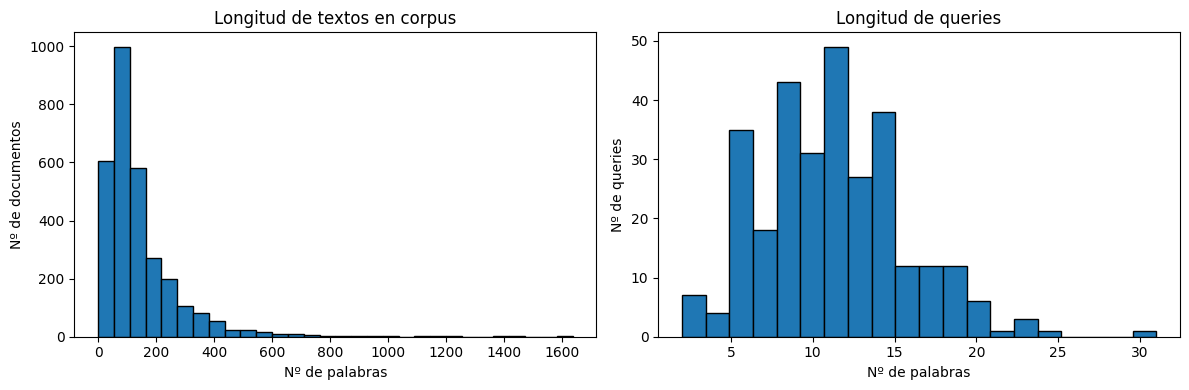

In [4]:
# Longitud de textos  (num de palabras)
corpus['text_length'] = corpus['text'].fillna("").apply(lambda x: len(str(x).split()))
queries['text_length'] = queries['text'].fillna("").apply(lambda x: len(str(x).split()))

# Estadísticas descriptivas
print("Longitud de textos en el corpus (número de palabras):")
print(corpus['text_length'].describe())

print("\nLongitud de queries (número de palabras):")
print(queries['text_length'].describe())

# Histogramas
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(corpus['text_length'], bins=30, edgecolor='black')
plt.title("Longitud de textos en corpus")
plt.xlabel("Nº de palabras")
plt.ylabel("Nº de documentos")

plt.subplot(1,2,2)
plt.hist(queries['text_length'], bins=20, edgecolor='black')
plt.title("Longitud de queries")
plt.xlabel("Nº de palabras")
plt.ylabel("Nº de queries")

plt.tight_layout()
plt.show()



- La longitud media de los textos en el corpus es de 143 palabras, con bastante variabilidad (desviación estándar de 133). Hay textos desde 0 hasta 1635 palabras. La mayoría están entre 60 y 175 palabras.
- En las queries, la media es de 11 palabras. La distribución es mucho más compacta y homogénea, con la mayoría entre 8 y 14 palabras.
- Los histogramas muestran que hay algunos textos largos en el corpus, pero la mayoría son de longitud moderada. No se observan anomalías en la longitud de las queries.


In [5]:
# Chequeo de valores nulos
print("Valores nulos en queries:")
print(queries.isnull().sum())

print("\nValores nulos en corpus:")
print(corpus.isnull().sum())

print("\nValores nulos en qrels:")
print(qrels.isnull().sum())

# Chequeo de duplicados
print("\nDuplicados en queries (por _id):", queries['_id'].duplicated().sum())
print("Duplicados en corpus (por _id):", corpus['_id'].duplicated().sum())
print("Duplicados en qrels (por ['query_id', 'doc_id']):", qrels.duplicated(subset=['query_id', 'doc_id']).sum())

# Chequeo de textos vacíos
print("\nTextos vacíos en corpus:", (corpus['text'].fillna("").str.strip() == "").sum())
print("Textos vacíos en queries:", (queries['text'].fillna("").str.strip() == "").sum())


Valores nulos en queries:
_id            0
text           0
metadata       0
text_length    0
dtype: int64

Valores nulos en corpus:
_id               0
title          3000
text              2
metadata          0
text_length       0
dtype: int64

Valores nulos en qrels:
query_id     0
doc_id       0
relevance    0
dtype: int64

Duplicados en queries (por _id): 0
Duplicados en corpus (por _id): 0
Duplicados en qrels (por ['query_id', 'doc_id']): 0

Textos vacíos en corpus: 2
Textos vacíos en queries: 0


### Resultados

- No hay valores nulos ni duplicados en queries ni en qrels.
- En el corpus, la columna `title` está vacía y se puede eliminar.
- Hay 2 documentos en el corpus con el campo `text` nulo o vacío, que conviene eliminar para evitar problemas posteriores.
- No hay textos vacíos en queries.


In [6]:
# Eliminar documentos del corpus con 'text' nulo o vacío
corpus_clean = corpus[corpus['text'].fillna("").str.strip() != ""].copy()

# Eliminar columna 'title'
if 'title' in corpus_clean.columns:
    corpus_clean = corpus_clean.drop(columns=['title'])

# Guardar archivos limpios
corpus_clean.to_csv("../data/subset_corpus_clean.csv", index=False)
queries.to_csv("../data/subset_queries_clean.csv", index=False)
qrels.to_csv("../data/subset_qrels_clean.csv", index=False)

print("Archivos limpios guardados en data/:")
print(" - subset_corpus_clean.csv")
print(" - subset_queries_clean.csv")
print(" - subset_qrels_clean.csv")
print(f"Corpus limpio: {corpus_clean.shape[0]} documentos")


Archivos limpios guardados en data/:
 - subset_corpus_clean.csv
 - subset_queries_clean.csv
 - subset_qrels_clean.csv
Corpus limpio: 2998 documentos


---
## 5. Ejemplos cualitativos

Se muestran algunos ejemplos de queries con sus documentos relevantes.

In [12]:
import random

queries_clean = pd.read_csv("../data/subset_queries_clean.csv")
corpus_clean = pd.read_csv("../data/subset_corpus_clean.csv")
qrels_clean = pd.read_csv("../data/subset_qrels_clean.csv")

# Elegimos queries aleatorias
query_ids = random.sample(list(queries_clean['_id']), 5)

for qid in query_ids:
    query_text = queries_clean.loc[queries_clean['_id'] == qid, 'text'].values[0]
    print(f"\nQuery ({qid}): {query_text}\n")
    docs_rel = qrels_clean[qrels_clean['query_id'] == qid]['doc_id']
    for doc_id in docs_rel:
        doc_text = corpus_clean.loc[corpus_clean['_id'] == doc_id, 'text'].values[0]
        print(f" - Documento relevante [{doc_id}]:\n{doc_text}\n")
    print("="*80)



Query (687): Online tool to connect to my bank account and tell me what I spend in different categories?

 - Documento relevante [146021]:
"I'm not convinced this is completely possible without additional data.  I'm categorizing my purchases now, and I keep running into things like ""was this hardware store purchase for home repair, hobby tools and supplies, cookware, ..."" Ditto for department stores, ditto for cash purchases which appear only as an ATM withdrawal. Sometimes I remember, sometimes I guess, sometimes I just give up. In the end, this budget tracking isn't critical for me so that's good enough. If you really want accuracy, though, I think you are stuck with keeping all your receipts, of taking notes, so you can resolve these gaps."

 - Documento relevante [268992]:
I use Banktivity.  It's very much not free, but it automatically downloads all my bank and credit card activity and has excellent reporting options.


Query (1676): W2 vs 1099 Employee status

 - Documento rel

In [13]:
# Encontrar la query con más documentos relevantes
qrels_por_query = qrels_clean.groupby('query_id').size()
qid_max = qrels_por_query.idxmax()
num_docs_max = qrels_por_query.max()

query_text = queries_clean.loc[queries_clean['_id'] == qid_max, 'text'].values[0]
print(f"Query con más documentos relevantes ({num_docs_max} docs):")
print(f"Query ID: {qid_max}")
print(f"Texto: {query_text}\n")

docs_rel = qrels_clean[qrels_clean['query_id'] == qid_max]['doc_id']
for doc_id in docs_rel:
    doc_text = corpus_clean.loc[corpus_clean['_id'] == doc_id, 'text'].values[0]
    print(f"- Documento relevante [{doc_id}]:\n{doc_text}\n")
    print("-"*60)


Query con más documentos relevantes (15 docs):
Query ID: 2348
Texto: Why can't you just have someone invest for you and split the profits (and losses) with him?

- Documento relevante [211867]:
The 2 and 20 rule is a premium arrangement that hedge funds offer and venture capital funds offer, and they also offer different variations of it. The 2 is the management fee as percent of assets under management, the 20 is the profit cut, which they only get if they are profitable. There are 0/20, 1/15, and many variations. You're assuming that nobody offers this arrangement because it isn't offered to you, but that's because nobody offers it to people that aren't wealthy enough to legally qualify for their fund. When you park 6 or 7 figure amounts in bank accounts, they'll send your information out to the funds that operate the way you wish they operated.

------------------------------------------------------------
- Documento relevante [247486]:
This means that if your capital under my manag

### Observaciones sobre la relación entre queries y documentos relevantes

Al revisar manualmente varias queries y sus documentos relevantes, se observa que:

- En general, **los textos de los documentos relevantes no repiten literalmente las palabras de la query**. Suelen responder a la intención o el tema, pero usando sinónimos, explicaciones largas o términos relacionados. 
- En queries abiertas o abstractas (como “Why can't you just have someone invest for you and split the profits (and losses) with him?”), las respuestas relevantes desarrollan el tema, pero muchas veces sin usar las palabras exactas de la pregunta.